In [4]:
import pandas as pd
import numpy as np

# Load the EV charging sessions dataset
df = pd.read_csv('ev_charging_sessions.csv')

print("EV Charging Sessions Dataset Loaded Successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 records:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

EV Charging Sessions Dataset Loaded Successfully!

Dataset shape: (3500, 10)
Columns: ['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time', 'end_time', 'duration_min', 'energy_kWh', 'session_day', 'session_type']

First 5 records:
  session_id user_id vehicle_id station_id           start_time  \
0     CS0001    U339       V347       S091  2024-11-11 12:09:00   
1     CS0002    U286       V463       S025  2024-11-10 19:51:00   
2     CS0003    U092       V419       S007  2024-11-26 18:46:00   
3     CS0004    U369       V070       S008  2024-11-28 19:53:00   
4     CS0005    U185       V298       S037  2024-11-27 13:09:00   

              end_time  duration_min  energy_kWh session_day session_type  
0  2024-11-11 13:26:00            77       26.87     Weekday   Occasional  
1  2024-11-10 21:28:00            97       67.47     Weekend    Emergency  
2  2024-11-26 20:43:00           117       60.16     Weekend      Regular  
3  2024-11-28 21:42:00           109       39.19

# Data Quality Check

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Data info
print("\nDataset Info:")
df.info()


Missing values per column:
session_id      0
user_id         0
vehicle_id      0
station_id      0
start_time      0
end_time        0
duration_min    0
energy_kWh      0
session_day     0
session_type    0
dtype: int64

Total missing values: 0

Duplicate rows: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   session_id    3500 non-null   object 
 1   user_id       3500 non-null   object 
 2   vehicle_id    3500 non-null   object 
 3   station_id    3500 non-null   object 
 4   start_time    3500 non-null   object 
 5   end_time      3500 non-null   object 
 6   duration_min  3500 non-null   int64  
 7   energy_kWh    3500 non-null   float64
 8   session_day   3500 non-null   object 
 9   session_type  3500 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 273.6+ KB


# Dataset Summary and Unique Values

In [6]:
# Unique values in categorical columns
print("Unique values in categorical columns:")
print(f"\nSession Types: {df['session_type'].unique()}")
print(f"Session Type Counts:\n{df['session_type'].value_counts()}")

print(f"\nSession Days: {df['session_day'].unique()}")
print(f"Session Day Counts:\n{df['session_day'].value_counts()}")

print(f"\nUnique Users: {df['user_id'].nunique()}")
print(f"Unique Vehicles: {df['vehicle_id'].nunique()}")
print(f"Unique Stations: {df['station_id'].nunique()}")


Unique values in categorical columns:

Session Types: ['Occasional' 'Emergency' 'Regular']
Session Type Counts:
session_type
Emergency     1198
Occasional    1152
Regular       1150
Name: count, dtype: int64

Session Days: ['Weekday' 'Weekend']
Session Day Counts:
session_day
Weekday    1760
Weekend    1740
Name: count, dtype: int64

Unique Users: 500
Unique Vehicles: 499
Unique Stations: 100


In [7]:
# Display the full dataframe
df

,session_id,user_id,vehicle_id,station_id,start_time,end_time,duration_min,energy_kWh,session_day,session_type
0,CS0001,U339,V347,S091,2024-11-11 12:09:00,2024-11-11 13:26:00,77,26.87,Weekday,Occasional
1,CS0002,U286,V463,S025,2024-11-10 19:51:00,2024-11-10 21:28:00,97,67.47,Weekend,Emergency
2,CS0003,U092,V419,S007,2024-11-26 18:46:00,2024-11-26 20:43:00,117,60.16,Weekend,Regular
3,CS0004,U369,V070,S008,2024-11-28 19:53:00,2024-11-28 21:42:00,109,39.19,Weekday,Emergency
4,CS0005,U185,V298,S037,2024-11-27 13:09:00,2024-11-27 14:28:00,79,61.71,Weekend,Occasional
...,...,...,...,...,...,...,...,...,...,...
3495,CS3496,U357,V387,S094,2024-11-12 19:19:00,2024-11-12 21:00:00,101,72.29,Weekday,Regular
3496,CS3497,U328,V308,S076,2024-11-20 18:50:00,2024-11-20 20:04:00,74,57.34,Weekend,Emergency
3497,CS3498,U358,V110,S011,2024-11-05 13:46:00,2024-11-05 15:33:00,107,29.87,Weekend,Regular
3498,CS3499,U396,V475,S092,2024-11-25 22:08:00,2024-11-25 23:20:00,72,30.67,Weekday,Emergency


In [8]:
# Verify no missing values (dataset is clean)
print("Checking for any missing values:")
print(df.isnull().sum())
print(f"\nDataset is clean: {df.isnull().sum().sum() == 0}")

Checking for any missing values:
session_id      0
user_id         0
vehicle_id      0
station_id      0
start_time      0
end_time        0
duration_min    0
energy_kWh      0
session_day     0
session_type    0
dtype: int64

Dataset is clean: True


We’re trying to predict the energy consumed in a charging session

In [9]:
import pandas as pd

df = pd.read_csv("ev_charging_sessions.csv", parse_dates=["start_time", "end_time"]).copy()


In [10]:
df = df.copy()  # ensure modifications are on a copy
df["start_hour"] = df["start_time"].dt.hour
df["day_of_week"] = df["start_time"].dt.dayofweek  # Monday=0

# Derived feature
df["energy_per_min"] = df["energy_kWh"] / df["duration_min"]


In [11]:
df_encoded = pd.get_dummies(df, columns=["session_type", "session_day"], drop_first=True).copy()


In [12]:
features = [
    "duration_min",
    "start_hour",
    "day_of_week",
    "session_type_Occasional",
    "session_type_Regular",
    "session_day_Weekend"
]

X = df_encoded[features].copy()
y = df_encoded["energy_kWh"].copy()


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train.copy(), y_train.copy())


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test.copy())

mae = mean_absolute_error(y_test.copy(), y_pred)
rmse = np.sqrt(mean_squared_error(y_test.copy(), y_pred))
r2 = r2_score(y_test.copy(), y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 11.298719356575964
RMSE: 14.303424933158713
R²: 0.48348424047369787


MAE = 11.3 kWh → On average, predictions are off by ~11 kWh

RMSE = 14.3 kWh → Some sessions have higher deviations

R² = 0.48 → Model explains ~48% of variance in session energy

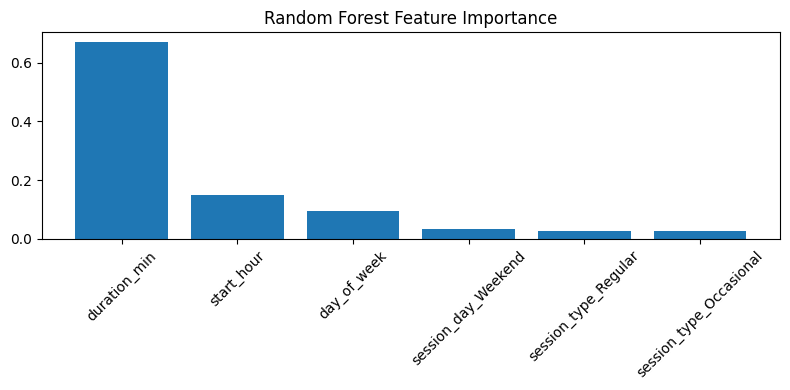

In [16]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


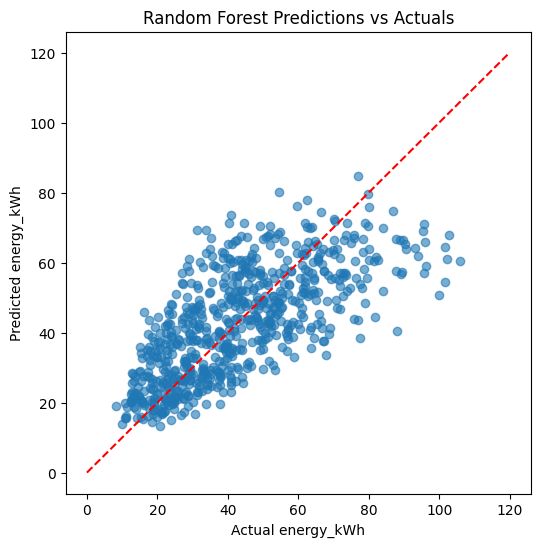

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test.copy(), y_pred, alpha=0.6)
plt.plot([0, 120], [0, 120], color='red', linestyle='--')
plt.xlabel("Actual energy_kWh")
plt.ylabel("Predicted energy_kWh")
plt.title("Random Forest Predictions vs Actuals")
plt.show()


In [18]:
# Make predictions
y_pred = rf.predict(X_test.copy())

# Combine actual vs predicted in a DataFrame
pred_df = X_test.copy()
pred_df["actual_energy_kWh"] = y_test.copy()
pred_df["predicted_energy_kWh"] = y_pred
pred_df["error_kWh"] = pred_df["predicted_energy_kWh"] - pred_df["actual_energy_kWh"]

# Show first 10 predictions
pred_df.head(10)


,duration_min,start_hour,day_of_week,session_type_Occasional,session_type_Regular,session_day_Weekend,actual_energy_kWh,predicted_energy_kWh,error_kWh
1650,115,17,1,False,False,True,35.23,66.937867,31.707867
2456,76,13,5,False,False,True,65.82,45.207633,-20.612367
2232,114,18,5,True,False,True,70.48,55.612267,-14.867733
1945,76,16,2,True,False,False,65.18,42.550900,-22.629100
309,63,17,0,False,False,False,58.84,33.091567,-25.748433
2341,75,13,2,True,False,False,55.51,35.748867,-19.761133
1666,68,6,1,False,True,True,52.27,40.034500,-12.235500
1681,44,7,4,False,False,True,13.57,27.628433,14.058433
1187,102,12,2,False,True,False,45.69,54.004367,8.314367
325,53,21,2,False,True,False,44.24,25.517925,-18.722075


In [19]:
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ Load Data and Safe Copy
# -----------------------------
df = pd.read_csv("ev_charging_sessions.csv", parse_dates=["start_time", "end_time"]).copy()

# -----------------------------
# 2️⃣ Temporal Features
# -----------------------------
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.dayofweek  # Monday=0
df['month'] = df['start_time'].dt.month
df['duration_hr'] = df['duration_min'] / 60

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['start_hour'].apply(time_of_day)

# -----------------------------
# 3️⃣ User-Level Features
# -----------------------------
user_stats = df.groupby('user_id').agg(
    avg_energy_per_user=('energy_kWh', 'mean'),
    avg_duration_per_user=('duration_min', 'mean'),
    sessions_per_user=('session_id', 'count')
).reset_index()

df = df.merge(user_stats, on='user_id', how='left')

# -----------------------------
# 4️⃣ Vehicle-Level Features
# -----------------------------
vehicle_stats = df.groupby('vehicle_id').agg(
    avg_energy_per_vehicle=('energy_kWh', 'mean'),
    avg_duration_per_vehicle=('duration_min', 'mean')
).reset_index()

df = df.merge(vehicle_stats, on='vehicle_id', how='left')

# -----------------------------
# 5️⃣ Derived Energy Features
# -----------------------------
df['energy_per_min'] = df['energy_kWh'] / df['duration_min']
df['energy_per_hr'] = df['energy_kWh'] / df['duration_hr']

# -----------------------------
# 6️⃣ Interaction Features (optional)
# -----------------------------
df['duration_starthour'] = df['duration_min'] * df['start_hour']
df['duration_dayofweek'] = df['duration_min'] * df['day_of_week']

# -----------------------------
# 7️⃣ Categorical Encoding
# -----------------------------
df = pd.get_dummies(df, columns=['session_type', 'session_day', 'time_of_day'], drop_first=True)

# -----------------------------
# 8️⃣ Prepare Features and Target
# -----------------------------
drop_cols = ['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time', 'end_time', 'energy_kWh']
X = df.drop(columns=drop_cols).copy()
y = df['energy_kWh'].copy()

print("Feature engineering complete!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature columns:", X.columns.tolist())


Feature engineering complete!
Features shape: (3500, 21)
Target shape: (3500,)
Feature columns: ['duration_min', 'start_hour', 'end_hour', 'day_of_week', 'month', 'duration_hr', 'avg_energy_per_user', 'avg_duration_per_user', 'sessions_per_user', 'avg_energy_per_vehicle', 'avg_duration_per_vehicle', 'energy_per_min', 'energy_per_hr', 'duration_starthour', 'duration_dayofweek', 'session_type_Occasional', 'session_type_Regular', 'session_day_Weekend', 'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train.copy(), y_train.copy())

y_pred = rf.predict(X_test.copy())


In [21]:
# Make predictions
y_pred = rf.predict(X_test.copy())

# Combine actual vs predicted in a DataFrame
pred_df = X_test.copy()
pred_df["actual_energy_kWh"] = y_test.copy()
pred_df["predicted_energy_kWh"] = y_pred
pred_df["error_kWh"] = pred_df["predicted_energy_kWh"] - pred_df["actual_energy_kWh"]

# Show first 10 predictions
pred_df.head(10)


,duration_min,start_hour,end_hour,day_of_week,month,duration_hr,avg_energy_per_user,avg_duration_per_user,sessions_per_user,avg_energy_per_vehicle,...,duration_dayofweek,session_type_Occasional,session_type_Regular,session_day_Weekend,time_of_day_evening,time_of_day_morning,time_of_day_night,actual_energy_kWh,predicted_energy_kWh,error_kWh
1650,115,17,19,1,11,1.916667,49.905000,87.125000,8,18.547778,...,115,False,False,True,True,False,False,35.23,35.627767,0.397767
2456,76,13,14,5,11,1.266667,55.791429,87.428571,7,67.090000,...,380,False,False,True,False,False,False,65.82,66.585233,0.765233
2232,114,18,20,5,11,1.900000,31.795000,62.200000,10,41.598000,...,570,True,False,True,True,False,False,70.48,71.009100,0.529100
1945,76,16,18,2,11,1.266667,49.933333,70.222222,9,64.280000,...,152,True,False,False,False,False,False,65.18,65.832033,0.652033
309,63,17,18,0,11,1.050000,60.861667,85.833333,6,70.588889,...,0,False,False,False,True,False,False,58.84,56.215833,-2.624167
2341,75,13,14,2,11,1.250000,46.120000,62.000000,2,56.110000,...,150,True,False,False,False,False,False,55.51,55.866867,0.356867
1666,68,6,7,1,11,1.133333,41.091429,69.714286,7,46.471111,...,68,False,True,True,False,True,False,52.27,52.575100,0.305100
1681,44,7,8,4,11,0.733333,47.205556,81.000000,9,21.904286,...,176,False,False,True,False,True,False,13.57,13.771533,0.201533
1187,102,12,13,2,11,1.700000,40.140556,72.277778,18,35.534615,...,204,False,True,False,False,False,False,45.69,46.458567,0.768567
325,53,21,22,2,11,0.883333,39.445000,82.000000,6,49.978182,...,106,False,True,False,False,False,True,44.24,44.524167,0.284167
